In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
from sklearn import datasets

In [4]:
wine = datasets.load_wine()

In [6]:
print(wine.keys())


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [8]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [12]:
df = pd.DataFrame(wine.data)

In [20]:
feature_name = wine.feature_names


In [113]:
feature_name

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [34]:
t = df.corr()

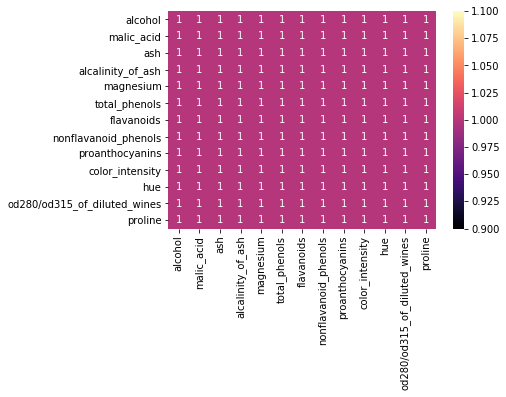

In [35]:
sns.heatmap(t, cmap='magma', annot=True)

In [39]:
f_name = wine.feature_names
df = pd.DataFrame(wine.data)

In [40]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [51]:
i = 0
for name in f_name:
    df[name] = df[i]
    i += 1
    

In [53]:
for i in range(0, 12):
    df.drop(i, axis=1, inplace=True)


In [55]:
df.drop(12, axis=1, inplace=True)

In [72]:
df['target'] = wine.target

In [59]:
cor = df.corr()

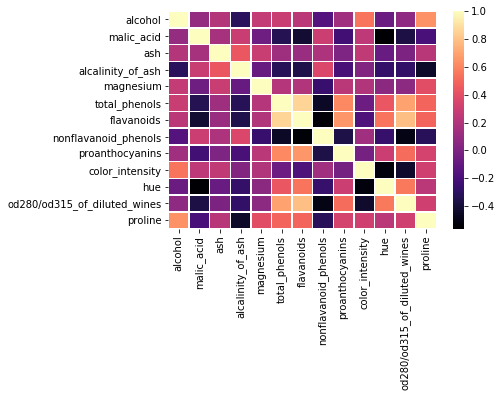

In [68]:
sns.heatmap(cor, cmap='magma', fmt=".2",linewidths=.5)

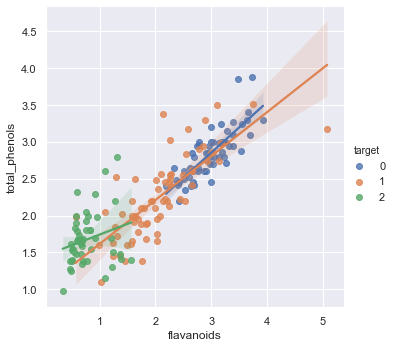

In [74]:
sns.set(style='darkgrid')
sns.lmplot(x='flavanoids', y='total_phenols', hue = 'target', data=df)

In [80]:
px.scatter(df, x='flavanoids', y='total_phenols', color='target')

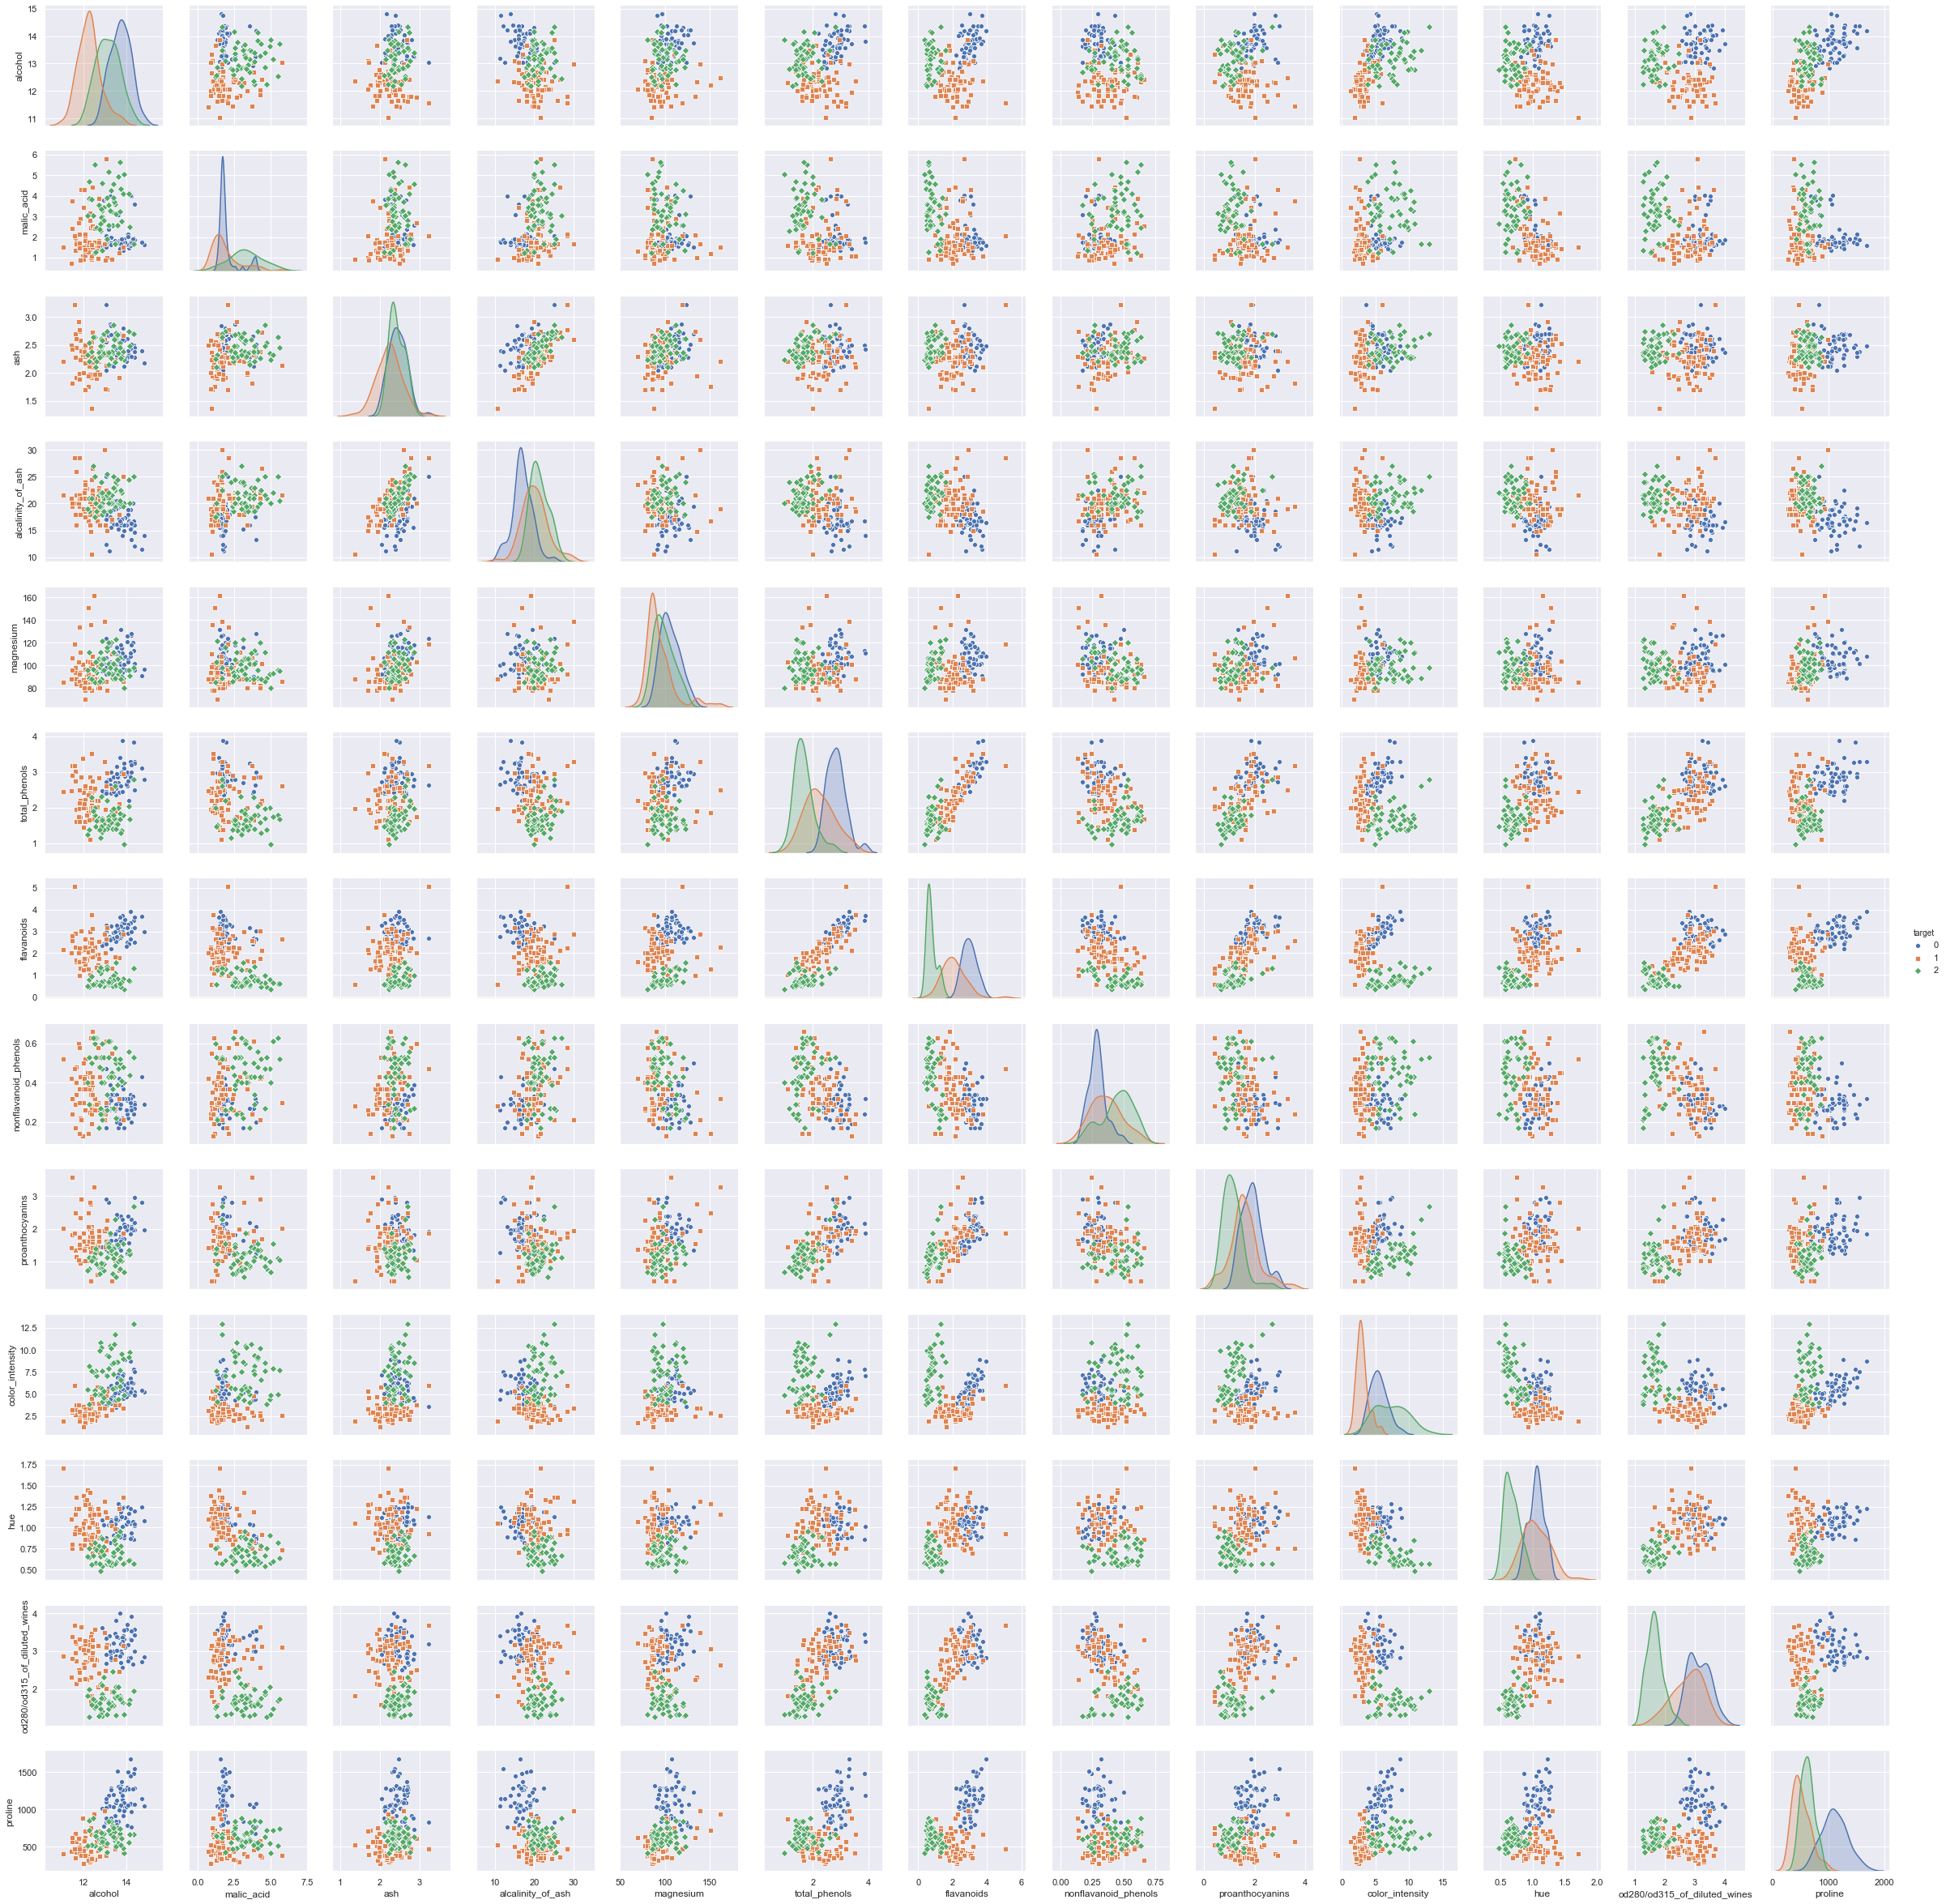

In [82]:
sns.pairplot(data=df, hue='target', markers=['o', 's', 'D'])

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [91]:
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [94]:
neighbors = list(range(1, 32))
scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred, ))
    

In [1]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=neighbors, y=scores))
fig.show()

NameError: name 'neighbors' is not defined

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [101]:
neighbors = list(range(1, 32))
scores = []
for k in neighbors:
    clf = RandomForestClassifier(n_estimators=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred, ))

In [103]:
fig = go.Figure(data=go.Scatter(x=neighbors, y=scores))
fig.show()

In [112]:
clf = RandomForestClassifier(n_estimators=15)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred, ))

0.9333333333333333


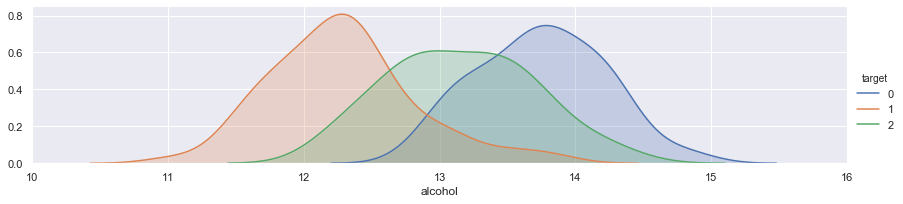

In [118]:
facet = sns.FacetGrid(df, hue='target', aspect=4)
facet.map(sns.kdeplot, 'alcohol', shade=True)
facet.set(xlim=(0, df['alcohol'].max()))
facet.add_legend()
plt.xlim(10, 16)

plt.show()